**data viz:**

tree map,
heatmap of accuracy as height, k and training period as x and y,
ranking of features in importance over time, cumulative accuracy over time, 

**Different measures of historical volatility:**

Close-to-Close, Exponentially Weighted, Parkinson, Garman-Klass, Rogers-Satchell and Yang-Zhang Volatility
http://www.todaysgroep.nl/media/236846/measuring_historic_volatility.pdf

**improving accuracy:**

http://thinknook.com/10-ways-to-improve-your-classification-algorithm-performance-2013-01-21/

http://stats.stackexchange.com/questions/38218/low-classification-accuracy-what-to-do-next

**Additional features:**

use yesterday's movement of vix as a factor
use yesterday's hi low close volatility of spx

someones implementation of garmin klass:
https://github.com/strimp099/volatility-trading

**transformations:**

%chg

level

%chg*level

distance from 1mo mean

mvg avg

volume* %chg in spx


gold, gold volatility

yield, yield volatility
10-2yr slope
30-10yr slope

twitter volume of spx, and individual components tweets vs. avg of last 3 mos

fed speakers

small cap, large cap

growth, value

libor-fedfunds (actual vs. expected)



try shorter train 20, 50 day train, test one day forward
Use RFE to find good factors


actual vol of minutely data for 500 stocks from last x days 
and figure out dispersion of it like is it everly dispersed 
(ie. >50% showed uptick in vol or concentrated ie. 20 stocks with 
very high uptick in minutely vol?)




Cliff Asness study on momentum and value:
http://faculty.chicagobooth.edu/tobias.moskowitz/research/JF_12021_TMcomments.pdf



**Trading Strategy Risk Management:**

The standard "rule of thumb" here is to update the Kelly allocation once a day. 

Further, the Kelly Criterion itself should be recalculated periodically, using a trailing mean and standard deviation with a lookback window. Again, for a strategy that trades roughly once a day, this lookback should be set to be on the order of 3-6 months of daily returns.

in practice many traders tend to use a more conservative leverage regime such as the Kelly Criterion divided by two, affectionately known as "half-Kelly". The Kelly Criterion should really be considered as an upper bound of leverage to use, rather than a direct specification. If this advice is not heeded then using the direct Kelly value can lead to ruin (i.e. account equity disappearing to zero) due to the non-Gaussian nature of the strategy returns.





In particular, we use an autoencoder composed of stacked restricted Boltzmann machines (RBMs) to extract features from stock prices, which we then pass to a feedforward neural network (FFNN) classifier.
http://cs229.stanford.edu/proj2013/TakeuchiLee-ApplyingDeepLearningToEnhanceMomentumTradingStrategiesInStocks.pdf



find influencers in twitter that spread their opinions


check for outliers



Still, market fear gauges remain contained. 
The gap between three-month Libor and expected fed-funds rates, 
for example, stands around 0.08 percentage point, 
a historically low level. At the height of the financial crisis, 
that gap was as wide as 4.80 percentage points.

weather
http://nipunbatra.github.io/2015/05/weather/
FX dollar vs. basket
inflation projects from TIPS
30y mtg rate
S&P trading volume
bad international news
ensemble of best predictors on twitter based on accuracy of sentiment so top 5 tweeters whose sentiment best predicts movement
suggested trade
why use ensemble - why not just use the best one
how to capture fear in market coming from global geopolitics events?
daily lda on most popular new articles, find top topics and calculate sentiment of each of the top topics and see the trend of the sentiment of top topics
or calc sentiment of top googled news words
libor -

1. lda on news articles.  get top words in top 5 topics
2. cross check to see if they were top words googled
3. if top words persist over time then it is really on people's minds during that period (ie. greece)
4. if yes, get sentiment over time of top words in topics using that word wih hashtag
5. combine sentiment of top words of topics and average over them to get sentiment of topic

code to parse meeting dates of http://pastie.org/2566958


For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).
Challenge 2
For each, draw the ROC curve and calculate the AUC.
Challenge 3
Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas.io.data import DataReader
from datetime import datetime
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
symbols_list = ['^IRX','^GSPC', '^TNX', '^TYX', 'OIL', 'GLD', '^FVX', '^VIX', 'UUP']
d = {}
for ticker in symbols_list:
    d[ticker] = DataReader(ticker, "yahoo", '2010-01-01')
pan = pd.Panel(d)
df_Adj_Close = pan.minor_xs('Adj Close')

print(df_Adj_Close)
df_Volume = pan.minor_xs('Volume')
print(df_Volume)


                   GLD        OIL        UUP   ^FVX        ^GSPC   ^IRX  \
Date                                                                      
2010-01-04  109.800003  26.580000  22.920000  2.652  1132.989990  0.055   
2010-01-05  109.699997  26.700001  22.910000  2.558  1136.520020  0.060   
2010-01-06  111.510002  27.090000  22.850000  2.573  1137.140015  0.045   
2010-01-07  110.820000  26.930000  23.000000  2.600  1141.689941  0.045   
2010-01-08  111.370003  27.020000  22.840000  2.566  1144.979980  0.040   
2010-01-11  112.849998  26.820000  22.719999  2.556  1146.979980  0.025   
2010-01-12  110.489998  26.219999  22.719999  2.482  1136.219971  0.040   
2010-01-13  111.540001  25.930000  22.700001  2.532  1145.680054  0.050   
2010-01-14  112.029999  25.809999  22.639999  2.485  1148.459961  0.045   
2010-01-15  110.860001  25.350000  22.770000  2.419  1136.030029  0.055   
2010-01-19  111.519997  25.700001  22.840000  2.456  1150.229980  0.050   
2010-01-20  108.940002  2

In [4]:
symbols_list_spx = ['^GSPC']
d_spx = {}
for ticker in symbols_list_spx:
    d_spx[ticker] = DataReader(ticker, "yahoo", '2009-12-01')
pan_spx = pd.Panel(d_spx)

df_SPX_Open = pan_spx.minor_xs('Open')
df_SPX_Open.columns = ['SPX_Open']

df_SPX_High = pan_spx.minor_xs('High')
df_SPX_High.columns = ['SPX_High']

df_SPX_Low = pan_spx.minor_xs('Low')
df_SPX_Low.columns = ['SPX_Low']

df_SPX_Close = pan_spx.minor_xs('Close')
df_SPX_Close.columns = ['SPX_Close']

In [5]:
df_SPX_Open.head()

,SPX_Open
Date,
2009-12-01,1098.890015
2009-12-02,1109.030029
2009-12-03,1110.589966
2009-12-04,1100.430054
2009-12-07,1105.520020


In [6]:
df_SPX_GK_Vol = df_SPX_Open.join(df_SPX_High, how = 'outer').join(df_SPX_Low, how = 'outer').join(df_SPX_Close, how = 'outer')
# df_result = df_Adj_Close.join(df_Volume, how='outer')

In [7]:
df_SPX_GK_Vol.shape

(1430, 4)

In [8]:
df_SPX_GK_Vol.dtypes

SPX_Open     float64
SPX_High     float64
SPX_Low      float64
SPX_Close    float64
dtype: object

In [9]:
import math
constant = 2 * math.log(2) - 1
df_SPX_GK_Vol['GK_Vol'] = ( 0.5 * ( np.log( (df_SPX_GK_Vol['SPX_High'] / df_SPX_GK_Vol['SPX_Low'])**2 ) - constant * np.log( (df_SPX_GK_Vol['SPX_Close'] / df_SPX_GK_Vol['SPX_Open'])**2 ) ) )**0.5

#df_SPX_GK_Vol.head()
df_SPX_GK_Vol = df_SPX_GK_Vol.drop('SPX_Open', 1).drop('SPX_High', 1).drop('SPX_Low', 1).drop('SPX_Close', 1)



In [10]:
df_SPX_GK_Vol.head()

,GK_Vol
Date,
2009-12-01,0.092857
2009-12-02,0.095883
2009-12-03,0.143047
2009-12-04,0.135892
2009-12-07,0.098682


In [11]:
df_Adj_Close = df_Adj_Close.rename(columns={'UUP': 'USDollar_Close', 'GLD': 'GLD_Close', 'OIL': 'OIL_Close', '^FVX': 'five_yr_Yield_Close', '^GSPC': 'SP500_Close', '^IRX': 'thirteen_wk_Tbill_Close', '^TNX': 'ten_yr_Yield_Close', '^TYX': 'thirty_yr_Yield_Close', '^VIX': 'VIX_Close'})

df_Adj_Close.head()

,GLD_Close,OIL_Close,USDollar_Close,five_yr_Yield_Close,SP500_Close,thirteen_wk_Tbill_Close,ten_yr_Yield_Close,thirty_yr_Yield_Close,VIX_Close
Date,,,,,,,,,
2010-01-04,109.800003,26.580000,22.92,2.652,1132.989990,0.055,3.841,4.660,20.040001
2010-01-05,109.699997,26.700001,22.91,2.558,1136.520020,0.060,3.755,4.593,19.350000
2010-01-06,111.510002,27.090000,22.85,2.573,1137.140015,0.045,3.808,4.671,19.160000
2010-01-07,110.820000,26.930000,23.00,2.600,1141.689941,0.045,3.822,4.689,19.059999
2010-01-08,111.370003,27.020000,22.84,2.566,1144.979980,0.040,3.808,4.695,18.129999


In [12]:
df_Volume.head()

,GLD,OIL,UUP,^FVX,^GSPC,^IRX,^TNX,^TYX,^VIX
Date,,,,,,,,,
2010-01-04,16224100,1216000,5083600,0,3991400000,0,0,0,0
2010-01-05,14213100,618700,6185000,0,2491020000,0,0,0,0
2010-01-06,24981900,1237000,5693300,0,4972660000,0,0,0,0
2010-01-07,13609800,623400,5844100,0,5270680000,0,0,0,0
2010-01-08,15894600,672300,7371900,0,4389590000,0,0,0,0


In [13]:
df_Volume = df_Volume.drop(['^IRX', '^FVX', '^TNX', '^TYX', '^VIX'], 1)

In [14]:
df_Volume = df_Volume.rename(columns={'UUP': 'USDollarIndex_Volume', 'GLD': 'GLD_Volume', 'OIL': 'OIL_Volume', '^GSPC': 'SP500_Volume'})

In [15]:
df_result = df_Adj_Close.join(df_Volume, how='outer').join(df_SPX_GK_Vol, how='outer')

In [16]:
df_result = df_result.dropna()

In [17]:
df_result[df_result.isnull().any(axis=1)]

,GLD_Close,OIL_Close,USDollar_Close,five_yr_Yield_Close,SP500_Close,thirteen_wk_Tbill_Close,ten_yr_Yield_Close,thirty_yr_Yield_Close,VIX_Close,GLD_Volume,OIL_Volume,USDollarIndex_Volume,SP500_Volume,GK_Vol
Date,,,,,,,,,,,,,,


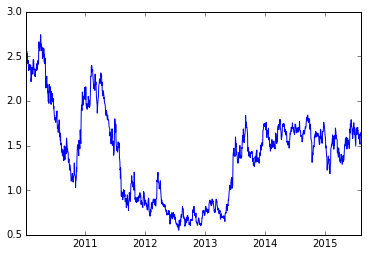

In [18]:
#plt.plot(site2.index.values, site2['Cl'])
plt.plot(df_result.index, df_result.five_yr_Yield_Close)
plt.show()

In [19]:
list(df_result.columns.values)

['GLD_Close',
 'OIL_Close',
 'USDollar_Close',
 'five_yr_Yield_Close',
 'SP500_Close',
 'thirteen_wk_Tbill_Close',
 'ten_yr_Yield_Close',
 'thirty_yr_Yield_Close',
 'VIX_Close',
 'GLD_Volume',
 'OIL_Volume',
 'USDollarIndex_Volume',
 'SP500_Volume',
 'GK_Vol']

In [20]:
import Quandl

#mydata = Quandl.get("NSE/OIL", trim_start="yyyy-mm-dd", trim_end="yyyy-mm-dd")
usdollardata = Quandl.get("FRED/DTWEXB", trim_start="2000-02-01", trim_end="2015-07-24") 

In [21]:
df_result = df_result.sort_index()

In [22]:
df_result.head()

,GLD_Close,OIL_Close,USDollar_Close,five_yr_Yield_Close,SP500_Close,thirteen_wk_Tbill_Close,ten_yr_Yield_Close,thirty_yr_Yield_Close,VIX_Close,GLD_Volume,OIL_Volume,USDollarIndex_Volume,SP500_Volume,GK_Vol
Date,,,,,,,,,,,,,,
2010-01-04,109.800003,26.580000,22.92,2.652,1132.989990,0.055,3.841,4.660,20.040001,16224100,1216000,5083600,3991400000,0.098697
2010-01-05,109.699997,26.700001,22.91,2.558,1136.520020,0.060,3.755,4.593,19.350000,14213100,618700,6185000,2491020000,0.069547
2010-01-06,111.510002,27.090000,22.85,2.573,1137.140015,0.045,3.808,4.671,19.160000,24981900,1237000,5693300,4972660000,0.064220
2010-01-07,110.820000,26.930000,23.00,2.600,1141.689941,0.045,3.822,4.689,19.059999,13609800,623400,5844100,5270680000,0.089222
2010-01-08,111.370003,27.020000,22.84,2.566,1144.979980,0.040,3.808,4.695,18.129999,15894600,672300,7371900,4389590000,0.080812


In [23]:
df_diffs = df_result.diff()

In [24]:
df_diffs.head(10)

,GLD_Close,OIL_Close,USDollar_Close,five_yr_Yield_Close,SP500_Close,thirteen_wk_Tbill_Close,ten_yr_Yield_Close,thirty_yr_Yield_Close,VIX_Close,GLD_Volume,OIL_Volume,USDollarIndex_Volume,SP500_Volume,GK_Vol
Date,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.100006,0.120001,-0.010000,-0.094,3.530030,0.005,-0.086,-0.067,-0.690001,-2011000,-597300,1101400,-1500380000,-0.029150
2010-01-06,1.810005,0.389999,-0.060000,0.015,0.619995,-0.015,0.053,0.078,-0.190000,10768800,618300,-491700,2481640000,-0.005327
2010-01-07,-0.690002,-0.160000,0.150000,0.027,4.549926,0.000,0.014,0.018,-0.100001,-11372100,-613600,150800,298020000,0.025001
2010-01-08,0.550003,0.090000,-0.160000,-0.034,3.290039,-0.005,-0.014,0.006,-0.930000,2284800,48900,1527800,-881090000,-0.008410
2010-01-11,1.479995,-0.200000,-0.120001,-0.010,2.000000,-0.015,0.010,0.034,-0.580000,1358400,209700,665300,-133810000,-0.000853
2010-01-12,-2.360000,-0.600001,0.000000,-0.074,-10.760009,0.015,-0.099,-0.106,0.700001,11929600,-203000,2449700,460380000,0.034731
2010-01-13,1.050003,-0.289999,-0.019998,0.050,9.460083,0.010,0.064,0.084,-0.400000,-9168600,166200,-5827500,-545800000,-0.012176
2010-01-14,0.489998,-0.120001,-0.060002,-0.047,2.779907,-0.005,-0.049,-0.083,-0.220001,-1708700,-431400,3140400,-255160000,-0.033044


In [25]:
df_diffs = df_diffs.dropna()

In [26]:
df_diffs.head(3)

,GLD_Close,OIL_Close,USDollar_Close,five_yr_Yield_Close,SP500_Close,thirteen_wk_Tbill_Close,ten_yr_Yield_Close,thirty_yr_Yield_Close,VIX_Close,GLD_Volume,OIL_Volume,USDollarIndex_Volume,SP500_Volume,GK_Vol
Date,,,,,,,,,,,,,,
2010-01-05,-0.100006,0.120001,-0.01,-0.094,3.530030,0.005,-0.086,-0.067,-0.690001,-2011000,-597300,1101400,-1500380000,-0.029150
2010-01-06,1.810005,0.389999,-0.06,0.015,0.619995,-0.015,0.053,0.078,-0.190000,10768800,618300,-491700,2481640000,-0.005327
2010-01-07,-0.690002,-0.160000,0.15,0.027,4.549926,0.000,0.014,0.018,-0.100001,-11372100,-613600,150800,298020000,0.025001


In [27]:
list(df_diffs.columns.values)

['GLD_Close',
 'OIL_Close',
 'USDollar_Close',
 'five_yr_Yield_Close',
 'SP500_Close',
 'thirteen_wk_Tbill_Close',
 'ten_yr_Yield_Close',
 'thirty_yr_Yield_Close',
 'VIX_Close',
 'GLD_Volume',
 'OIL_Volume',
 'USDollarIndex_Volume',
 'SP500_Volume',
 'GK_Vol']

In [28]:
df_diffs.shape

(1406, 14)

In [29]:
df_VIX_Close = df_diffs['VIX_Close']

-0.0044594601707
1.63570374746


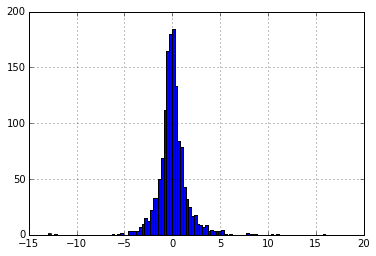

In [30]:
%matplotlib inline

plt.figure()

df_VIX_Close.hist(bins=101)
print df_VIX_Close.mean()
print df_VIX_Close.std()

In [31]:
df_diffs.VIX_Close[df_diffs.VIX_Close <= 0] = 0
df_diffs.VIX_Close[df_diffs.VIX_Close > 0] = 1

In [32]:
df_diffs.head(10)

,GLD_Close,OIL_Close,USDollar_Close,five_yr_Yield_Close,SP500_Close,thirteen_wk_Tbill_Close,ten_yr_Yield_Close,thirty_yr_Yield_Close,VIX_Close,GLD_Volume,OIL_Volume,USDollarIndex_Volume,SP500_Volume,GK_Vol
Date,,,,,,,,,,,,,,
2010-01-05,-0.100006,0.120001,-0.010000,-0.094,3.530030,0.005,-0.086,-0.067,0,-2011000,-597300,1101400,-1500380000,-0.029150
2010-01-06,1.810005,0.389999,-0.060000,0.015,0.619995,-0.015,0.053,0.078,0,10768800,618300,-491700,2481640000,-0.005327
2010-01-07,-0.690002,-0.160000,0.150000,0.027,4.549926,0.000,0.014,0.018,0,-11372100,-613600,150800,298020000,0.025001
2010-01-08,0.550003,0.090000,-0.160000,-0.034,3.290039,-0.005,-0.014,0.006,0,2284800,48900,1527800,-881090000,-0.008410
2010-01-11,1.479995,-0.200000,-0.120001,-0.010,2.000000,-0.015,0.010,0.034,0,1358400,209700,665300,-133810000,-0.000853
2010-01-12,-2.360000,-0.600001,0.000000,-0.074,-10.760009,0.015,-0.099,-0.106,1,11929600,-203000,2449700,460380000,0.034731
2010-01-13,1.050003,-0.289999,-0.019998,0.050,9.460083,0.010,0.064,0.084,0,-9168600,166200,-5827500,-545800000,-0.012176
2010-01-14,0.489998,-0.120001,-0.060002,-0.047,2.779907,-0.005,-0.049,-0.083,0,-1708700,-431400,3140400,-255160000,-0.033044
2010-01-15,-1.169998,-0.459999,0.130001,-0.066,-12.429932,0.010,-0.058,-0.049,1,-302600,130600,-4746400,843530000,0.065913


In [33]:
df_diffs['VIX_Close_lag'] = df_diffs['VIX_Close'].abs()

In [34]:
df_diffs.VIX_Close = df_diffs.VIX_Close.shift(-1)

In [35]:
df_diffs

,GLD_Close,OIL_Close,USDollar_Close,five_yr_Yield_Close,SP500_Close,thirteen_wk_Tbill_Close,ten_yr_Yield_Close,thirty_yr_Yield_Close,VIX_Close,GLD_Volume,OIL_Volume,USDollarIndex_Volume,SP500_Volume,GK_Vol,VIX_Close_lag
Date,,,,,,,,,,,,,,,
2010-01-05,-0.100006,0.120001,-0.010000,-0.094,3.530030,0.005,-0.086,-0.067,0,-2011000,-597300,1101400,-1500380000,-0.029150,0
2010-01-06,1.810005,0.389999,-0.060000,0.015,0.619995,-0.015,0.053,0.078,0,10768800,618300,-491700,2481640000,-0.005327,0
2010-01-07,-0.690002,-0.160000,0.150000,0.027,4.549926,0.000,0.014,0.018,0,-11372100,-613600,150800,298020000,0.025001,0
2010-01-08,0.550003,0.090000,-0.160000,-0.034,3.290039,-0.005,-0.014,0.006,0,2284800,48900,1527800,-881090000,-0.008410,0
2010-01-11,1.479995,-0.200000,-0.120001,-0.010,2.000000,-0.015,0.010,0.034,1,1358400,209700,665300,-133810000,-0.000853,0
2010-01-12,-2.360000,-0.600001,0.000000,-0.074,-10.760009,0.015,-0.099,-0.106,0,11929600,-203000,2449700,460380000,0.034731,1
2010-01-13,1.050003,-0.289999,-0.019998,0.050,9.460083,0.010,0.064,0.084,0,-9168600,166200,-5827500,-545800000,-0.012176,0
2010-01-14,0.489998,-0.120001,-0.060002,-0.047,2.779907,-0.005,-0.049,-0.083,1,-1708700,-431400,3140400,-255160000,-0.033044,0
2010-01-15,-1.169998,-0.459999,0.130001,-0.066,-12.429932,0.010,-0.058,-0.049,0,-302600,130600,-4746400,843530000,0.065913,1


In [36]:
df_diffs = df_diffs[:-1] 

In [37]:
df_diffs[df_diffs.isnull().any(axis=1)]

,GLD_Close,OIL_Close,USDollar_Close,five_yr_Yield_Close,SP500_Close,thirteen_wk_Tbill_Close,ten_yr_Yield_Close,thirty_yr_Yield_Close,VIX_Close,GLD_Volume,OIL_Volume,USDollarIndex_Volume,SP500_Volume,GK_Vol,VIX_Close_lag
Date,,,,,,,,,,,,,,,


In [38]:
df_diffs.shape

(1405, 15)

In [47]:
df_diffs.to_csv('mcnultyXYdata.csv')

In [39]:
from sklearn.cross_validation import train_test_split

df_X = df_diffs.drop('VIX_Close', 1)

df_y = df_diffs.VIX_Close

split = 700
y_train = df_y.iloc[:split]
y_test = df_y.iloc[split:]
X_train = df_X.iloc[:split]
X_test = df_X.iloc[split:]

#= train_test_split(df_diffs.ix[:,0], df_diffs.ix[:,1:], test_size=0.2, random_state=0)

In [40]:
y_train.shape

(700,)

In [41]:
df_X.shape

(1405, 14)

In [42]:
#pca = PCA(n_components=3)
#pca.fit(X_train)
#X_train_new=pca.transform(X_test)

In [43]:
from sklearn import preprocessing
#normalize the data attributes
#normalized_X = preprocessing.normalize(X)
#standardize the data attributes
standardized_X = preprocessing.scale(df_X)
print standardized_X

[[ -6.14337919e-02   3.41118542e-01  -1.04432844e-01 ...,  -2.07420599e+00
   -8.47505209e-01  -9.23884195e-01]
 [  1.16304280e+00   1.03536923e+00  -5.42688927e-01 ...,   3.43081192e+00
   -1.54656719e-01  -9.23884195e-01]
 [ -4.39670508e-01  -3.78853034e-01   1.29798662e+00 ...,   4.12025670e-01
    7.27369551e-01  -9.23884195e-01]
 ..., 
 [ -5.29422202e-01  -8.41690252e-01   5.09125672e-01 ...,  -2.82789261e-01
    4.35446559e-01   1.08238674e+00]
 [  1.37305948e-01   2.38263256e-01   1.12269295e+00 ...,   9.67122147e-02
   -3.93019688e-01   1.08238674e+00]
 [ -2.40932051e-01  -2.76000319e-01  -1.04432844e-01 ...,   5.83382662e-01
   -2.75299231e-03  -9.23884195e-01]]


/Users/wilsonkung/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:153: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [44]:
y_train

Date
2010-01-05    0
2010-01-06    0
2010-01-07    0
2010-01-08    0
2010-01-11    1
2010-01-12    0
2010-01-13    0
2010-01-14    1
2010-01-15    0
2010-01-19    1
2010-01-20    1
2010-01-21    1
2010-01-22    0
2010-01-25    0
2010-01-26    0
2010-01-27    1
2010-01-28    1
2010-01-29    0
2010-02-01    0
2010-02-02    1
2010-02-03    1
2010-02-04    1
2010-02-05    1
2010-02-08    0
2010-02-09    0
2010-02-10    0
2010-02-11    0
2010-02-12    0
2010-02-16    0
2010-02-17    0
             ..
2012-08-31    1
2012-09-04    0
2012-09-05    0
2012-09-06    0
2012-09-07    1
2012-09-10    1
2012-09-11    0
2012-09-12    0
2012-09-13    1
2012-09-14    1
2012-09-17    0
2012-09-18    0
2012-09-19    1
2012-09-20    0
2012-09-21    1
2012-09-24    1
2012-09-25    1
2012-09-26    0
2012-09-27    1
2012-09-28    1
2012-10-01    0
2012-10-02    0
2012-10-03    0
2012-10-04    0
2012-10-05    1
2012-10-08    1
2012-10-09    0
2012-10-10    0
2012-10-11    1
2012-10-12    0
Name: VIX_Close, dt

In [45]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
modelfeatures = ExtraTreesClassifier()
modelfeatures.fit(X_train, y_train)
# display the relative importance of each attribute
print(modelfeatures.feature_importances_)

[ 0.07708808  0.08155787  0.07466962  0.07193695  0.08383918  0.06730903
  0.07575983  0.06829064  0.06537427  0.08788494  0.08098218  0.06750061
  0.07277443  0.02503238]


In [46]:
# Perform KNN on a rolling 50 day window basis and predict only next day

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_train_roll = []
accuracy_test_roll = []
clf_roll = KNeighborsClassifier( n_neighbors = 8 )

train_range = 50

for n in range(1401 - train_range):
    clf_roll.fit(df_X[n:n+train_range], df_y[n:n+train_range])
    # Make class predictions for all observations in X
    predicted_labels_test = clf_roll.predict(df_X[n+train_range:n+train_range+1])
    # Compare predicted class labels with actual class labels

    atrain_roll = clf_roll.score(df_X[n:n+train_range], df_y[n:n+train_range])
    accuracy_train_roll.append(atrain_roll)
    atest_roll = clf_roll.score(df_X[n+train_range:n+train_range+1], df_y[n+train_range:n+train_range+1])
    accuracy_test_roll.append(atest_roll)

#print accuracy_train_roll
rolling_test_acc = sum(accuracy_test_roll) / len(accuracy_test_roll)

print( 'accuracy: %.5f' % ( rolling_test_acc ) )
    #print accuracy_test_2

accuracy: 0.50999


accuracy: 0.5176
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
[0.51761322789360176, 0.51443001443001446, 0.51484431571325129, 0.51580668604651159, 0.51466083150984687, 0.51281112737920942, 0.51201847381127319, 0.51235250737463123, 0.51278888066452832, 0.51419019316493308, 0.51447359501050771, 0.51447105788423153, 0.5150551927411432, 0.51540616246498594, 0.51612414837244514]


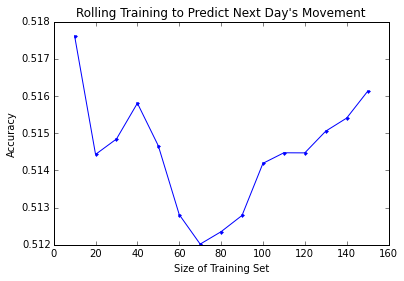

In [46]:
# USE THIS ONE: Perform KNN on a rolling n-day window basis and predict only next day

accuracy_train_roll = []
indiv_accuracy_test_roll = []
accuracy_test_roll = []

clf_roll = KNeighborsClassifier( n_neighbors = 8 )

#train_ranges = [50]
train_ranges = range(10, 155, 10)

for train_range in train_ranges:
    for n in range(1401 - train_range):
        clf_roll.fit(df_X[n:n+train_range], df_y[n:n+train_range])
        # Make class predictions for all observations in X
        predicted_labels_test = clf_roll.predict(df_X[n+train_range:n+train_range+1])
        # Compare predicted class labels with actual class labels

        atrain_roll = clf_roll.score(df_X[n:n+train_range], df_y[n:n+train_range])
        accuracy_train_roll.append(atrain_roll)
        atest_roll = clf_roll.score(df_X[n+train_range:n+train_range+1], df_y[n+train_range:n+train_range+1])
        indiv_accuracy_test_roll.append(atest_roll)

    #print accuracy_train_roll
    rolling_test_acc = sum(indiv_accuracy_test_roll) / len(indiv_accuracy_test_roll)
    accuracy_test_roll.append(rolling_test_acc)

print( 'accuracy: %.4f' % ( accuracy_test_roll[0] ) )
print range(10, 155, 10)
print accuracy_test_roll
        #print accuracy_test_2

import matplotlib.pyplot as plt
%matplotlib inline

#plt.plot(train_ranges,accuracy_train,'.r-',label='train')
plt.plot(train_ranges, accuracy_test_roll,'.b-', label='test')

#plt.legend()
plt.title("Rolling Training to Predict Next Day's Movement")
plt.xlabel('Size of Training Set')
plt.ylabel('Accuracy')

[1.0, 0.73999999999999999, 0.73142857142857143, 0.65142857142857147, 0.67142857142857137, 0.64714285714285713, 0.6328571428571429, 0.62571428571428567, 0.61142857142857143, 0.60999999999999999, 0.61571428571428577, 0.62, 0.61142857142857143, 0.62142857142857144, 0.61285714285714288, 0.61142857142857143, 0.62, 0.6071428571428571, 0.59285714285714286]
[0.49786628733997157, 0.52062588904694163, 0.52631578947368418, 0.50213371266002849, 0.50924608819345663, 0.52204836415362732, 0.54623044096728313, 0.53769559032716929, 0.52916073968705546, 0.50355618776671407, 0.49359886201991465, 0.50640113798008535, 0.51635846372688476, 0.51493598862019918, 0.49928876244665721, 0.49928876244665721, 0.50640113798008535, 0.50782361308677093, 0.50355618776671407]


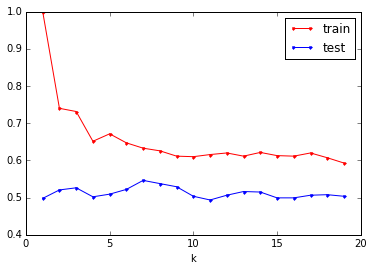

In [47]:
#KNN model with training on first 700 points and test on last 700 points

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_train = []
accuracy_test = []

for k in range(1, 20, 1):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
    # Make class predictions for all observations in X
    predicted_labels_test = clf.predict(X_test)
    # Compare predicted class labels with actual class labels

    atrain = clf.score(X_train,y_train)
    accuracy_train.append(atrain)
    atest = clf.score(X_test,y_test)
    accuracy_test.append(atest)
    
print accuracy_train
print accuracy_test
#print accuracy_test_2

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1,20,1),accuracy_train,'.r-',label='train')
plt.plot(range(1,20,1),accuracy_test,'.b-',label='test')

plt.legend()
plt.xlabel('k')

In [47]:
from sklearn.metrics import precision_recall_fscore_support

#y_true = np.array([0, 1, 2, 0, 1, 2])
#y_pred = np.array([0, 2, 1, 0, 0, 1])

precision_recall_fscore_support(y_test, predicted_labels_test)

ValueError: Found arrays with inconsistent numbers of samples: [  1 704]

In [48]:
print(metrics.classification_report(y_test, predicted_labels_test))

ValueError: Found arrays with inconsistent numbers of samples: [  1 704]

In [50]:
#print(metrics.classification_report(y_test, predicted_labels_test))
print(metrics.confusion_matrix(y_test, predicted_labels_test))

[[225 153]
 [196 129]]


optimal k is 6-10

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf_logit = LogisticRegression(C = 1.0)
clf_logit.fit(X_train, y_train)
    # Make class predictions for all observations in X

atrain_logit = clf_logit.score(X_train, y_train)
atest_logit = clf_logit.score(X_test, y_test)
    
print ('train accuracy: %.4f') % atrain_logit
print ('test accuracy: %.4f') % atest_logit

import matplotlib.pyplot as plt
%matplotlib inline

#plt.plot([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 2.0], accuracy_train_logit, '.r-')
#plt.plot([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 2.0], accuracy_test_logit, '.b-')

train accuracy: 0.5629
test accuracy: 0.4886


accuracy: 0.4973
[100, 200, 300, 400, 500, 600, 700, 800, 900]
[0.49730976172175251, 0.49720223820943243, 0.49819594782126009, 0.50086880973066894, 0.50136239782016345, 0.50126863304789093, 0.50135578707007278, 0.50078864353312302, 0.49969170057960294]


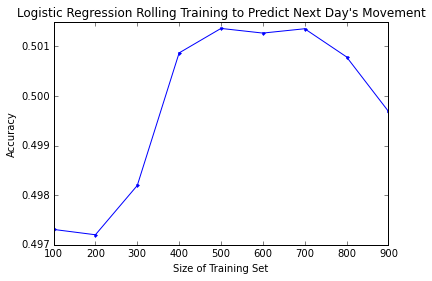

In [52]:
# USE THIS ONE: Perform Logistic on a rolling n-day window basis and predict only next day

accuracy_train_roll_logit = []
indiv_accuracy_test_roll_logit = []
accuracy_test_roll_logit = []

clf_roll_logit = LogisticRegression(C = 0.5)

#train_ranges = [50]
train_ranges = range(100, 1000, 100)

for train_range in train_ranges:
    for n in range(1401 - train_range):
        clf_roll_logit.fit(df_X[n:n+train_range], df_y[n:n+train_range])
        # Make class predictions for all observations in X
        predicted_labels_test_logit = clf_roll_logit.predict(df_X[n+train_range:n+train_range+1])
        # Compare predicted class labels with actual class labels

        atrain_roll_logit = clf_roll_logit.score(df_X[n:n+train_range], df_y[n:n+train_range])
        accuracy_train_roll_logit.append(atrain_roll_logit)
        atest_roll_logit = clf_roll_logit.score(df_X[n+train_range:n+train_range+1], df_y[n+train_range:n+train_range+1])
        indiv_accuracy_test_roll_logit.append(atest_roll_logit)

    #print accuracy_train_roll
    rolling_test_acc_logit = sum(indiv_accuracy_test_roll_logit) / len(indiv_accuracy_test_roll_logit)
    accuracy_test_roll_logit.append(rolling_test_acc_logit)

print( 'accuracy: %.4f' % ( accuracy_test_roll_logit[0] ) )
print train_ranges
print accuracy_test_roll_logit
        #print accuracy_test_2

import matplotlib.pyplot as plt
%matplotlib inline

#plt.plot(train_ranges,accuracy_train,'.r-',label='train')
plt.plot(train_ranges, accuracy_test_roll_logit,'.b-', label='test')

#plt.legend()
plt.title("Logistic Regression Rolling Training to Predict Next Day's Movement")
plt.xlabel('Size of Training Set')
plt.ylabel('Accuracy')

In [52]:
from sklearn.feature_selection import RFE

# create the RFE model and select 3 attributes
rfe = RFE(clf_logit, 3)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False  True  True  True False
 False False]
[ 5  6  7 10  3 12  9  8  1  1  1  2 11  4]


In [53]:
#700 data points of train and 700 data points of test

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

#SVM (Support Vector Machine) Classifier
from sklearn.svm import SVC

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
predicted_labels_test_NB = model_NB.predict(X_test)
acc_train_NB = model_NB.score(X_train,y_train)
acc_test_NB = model_NB.score(X_test,y_test)

model_SVC = SVC()
model_SVC.fit(X_train, y_train)
predicted_labels_test_SVC = model_SVC.predict(X_test)
acc_train_SVC = model_SVC.score(X_train,y_train)
acc_test_SVC = model_SVC.score(X_test,y_test)

model_DT = DecisionTreeClassifier()
model_DT = model_DT.fit(X_train, y_train)
predicted_labels_test_DT = model_DT.predict(X_test)
acc_train_DT = model_DT.score(X_train,y_train)
acc_test_DT = model_DT.score(X_test,y_test)

model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)
predicted_labels_test_RF = model_RF.predict(X_test)
acc_train_RF = model_RF.score(X_train,y_train)
acc_test_RF = model_RF.score(X_test,y_test)

print "Model:               NB  SVC   DT   RF"
print "Training Accurancy: %.2f %.2f %.2f %.2f" % (acc_train_NB, acc_train_SVC, acc_train_DT, acc_train_RF)
print "Test Accuracy:      %.2f %.2f %.2f %.2f" % (acc_test_NB,acc_test_SVC,acc_test_DT,acc_test_RF)

Model:               NB  SVC   DT   RF
Training Accurancy: 0.58 1.00 1.00 0.99
Test Accuracy:      0.52 0.54 0.50 0.50


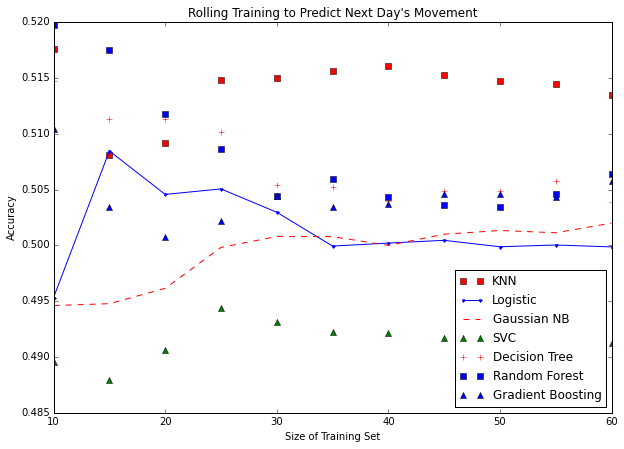

In [66]:
# USE THIS ONE: Perform NB, SVM, DT, and RF on a rolling n-day window basis and predict only next day

def calc_rolling_accuracy(class_model):
    accuracy_train_roll_logit = []
    indiv_accuracy_test_roll_logit = []
    accuracy_test_roll_logit = []

    #train_ranges = [50]
    train_ranges = range(10, 65, 5)

    for train_range in train_ranges:
        for n in range(1401 - train_range):
            class_model.fit(df_X[n:n+train_range], df_y[n:n+train_range])
            # Make class predictions for all observations in X
            predicted_labels_test_logit = class_model.predict(df_X[n+train_range:n+train_range+1])
            # Compare predicted class labels with actual class labels
            
            atrain_roll_logit = class_model.score(df_X[n:n+train_range], df_y[n:n+train_range])
            accuracy_train_roll_logit.append(atrain_roll_logit)
            atest_roll_logit = class_model.score(df_X[n+train_range:n+train_range+1], df_y[n+train_range:n+train_range+1])
            indiv_accuracy_test_roll_logit.append(atest_roll_logit)

            #print accuracy_train_roll
        rolling_test_acc_logit = sum(indiv_accuracy_test_roll_logit) / len(indiv_accuracy_test_roll_logit)
        accuracy_test_roll_logit.append(rolling_test_acc_logit)
        
    return train_ranges, accuracy_test_roll_logit

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 7), dpi=100)

clf_roll_KNN = KNeighborsClassifier( n_neighbors = 8 )
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_KNN)
plt.plot(train_ranges, accuracy_test_roll_logit,'rs', label='KNN')

clf_roll_logit = LogisticRegression(C = 0.5, random_state=1)
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_logit)
plt.plot(train_ranges, accuracy_test_roll_logit,'.b-', label='Logistic')

model_NB = GaussianNB()
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(model_NB)
plt.plot(train_ranges, accuracy_test_roll_logit,'r--', label='Gaussian NB')

model_SVC = SVC(random_state=1)
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(model_SVC)
plt.plot(train_ranges, accuracy_test_roll_logit,'g^', label='SVC')

model_DT = DecisionTreeClassifier(random_state=1)
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(model_DT)
plt.plot(train_ranges, accuracy_test_roll_logit,'r+', label='Decision Tree')

model_RF = RandomForestClassifier(random_state=1)
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(model_RF)
plt.plot(train_ranges, accuracy_test_roll_logit,'bs', label='Random Forest')

model_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(model_GB)
plt.plot(train_ranges, accuracy_test_roll_logit,'b^', label='Gradient Boosting')

#plt.figure(figsize=(8, 5))
plt.legend(loc='lower right')

plt.title("Rolling Training to Predict Next Day's Movement")
plt.xlabel('Size of Training Set')
plt.ylabel('Accuracy')

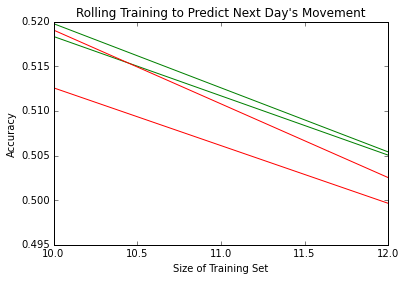

In [83]:
# USE THIS ONE: Perform NB, SVM, DT, and RF on a rolling n-day window basis and predict only next day
def calc_rolling_accuracy(class_model):
    accuracy_train_roll_logit = []
    indiv_accuracy_test_roll_logit = []
    accuracy_test_roll_logit = []

    #train_ranges = [50]
    train_ranges = range(10, 14, 2)

    for train_range in train_ranges:
        for n in range(1401 - train_range):
            class_model.fit(df_X[n:n+train_range], df_y[n:n+train_range])
            # Make class predictions for all observations in X
            predicted_labels_test_logit = class_model.predict(df_X[n+train_range:n+train_range+1])
            # Compare predicted class labels with actual class labels
            
            atrain_roll_logit = class_model.score(df_X[n:n+train_range], df_y[n:n+train_range])
            accuracy_train_roll_logit.append(atrain_roll_logit)
            atest_roll_logit = class_model.score(df_X[n+train_range:n+train_range+1], df_y[n+train_range:n+train_range+1])
            indiv_accuracy_test_roll_logit.append(atest_roll_logit)

            #print accuracy_train_roll
        rolling_test_acc_logit = sum(indiv_accuracy_test_roll_logit) / len(indiv_accuracy_test_roll_logit)
        accuracy_test_roll_logit.append(rolling_test_acc_logit)
        
    return train_ranges, accuracy_test_roll_logit


import matplotlib.pyplot as plt
%matplotlib inline

#model_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
#train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(model_GB)
#plt.plot(train_ranges, accuracy_test_roll_logit,'b^', label='Gradient Boosting')

#model_GB = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
#train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(model_GB)
#plt.plot(train_ranges, accuracy_test_roll_logit,'r^', label='Gradient Boosting')

#model_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=1, random_state=0)
#train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(model_GB)
#plt.plot(train_ranges, accuracy_test_roll_logit,'b+', label='Gradient Boosting')

#model_GB = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, max_depth=1, random_state=0)
#train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(model_GB)
#plt.plot(train_ranges, accuracy_test_roll_logit,'r+', label='Gradient Boosting')

#model_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0)
#train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(model_GB)
#plt.plot(train_ranges, accuracy_test_roll_logit,'g^', label='Gradient Boosting')

#model_GB = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=2, random_state=0)
#train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(model_GB)
#plt.plot(train_ranges, accuracy_test_roll_logit,'g+', label='Gradient Boosting')

model_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=2, random_state=0)
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(model_GB)
plt.plot(train_ranges, accuracy_test_roll_logit,'g-', label='Gradient Boosting')

model_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.25, max_depth=2, random_state=0)
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(model_GB)
plt.plot(train_ranges, accuracy_test_roll_logit,'r-', label='Gradient Boosting')

model_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=3, random_state=0)
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(model_GB)
plt.plot(train_ranges, accuracy_test_roll_logit,'g-', label='Gradient Boosting')

model_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.25, max_depth=3, random_state=0)
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(model_GB)
plt.plot(train_ranges, accuracy_test_roll_logit,'r-', label='Gradient Boosting')

#model_GB = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, max_depth=2, random_state=0)
#train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(model_GB)
#plt.plot(train_ranges, accuracy_test_roll_logit,'gs', label='Gradient Boosting')

plt.figure(figsize=(3, 3))
plt.legend(loc='upper right')

plt.title("Rolling Training to Predict Next Day's Movement")
plt.xlabel('Size of Training Set')
plt.ylabel('Accuracy')

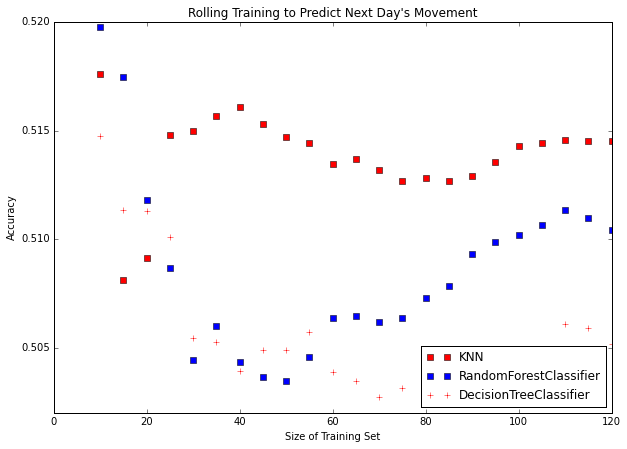

In [67]:
# USE THIS ONE: Perform NB, SVM, DT, and RF on a rolling n-day window basis and predict only next day

def calc_rolling_accuracy(class_model):
    accuracy_train_roll_logit = []
    indiv_accuracy_test_roll_logit = []
    accuracy_test_roll_logit = []

    #train_ranges = [50]
    train_ranges = range(10, 125, 5)

    for train_range in train_ranges:
        for n in range(1401 - train_range):
            class_model.fit(df_X[n:n+train_range], df_y[n:n+train_range])
            # Make class predictions for all observations in X
            predicted_labels_test_logit = class_model.predict(df_X[n+train_range:n+train_range+1])
            # Compare predicted class labels with actual class labels
            
            atrain_roll_logit = class_model.score(df_X[n:n+train_range], df_y[n:n+train_range])
            accuracy_train_roll_logit.append(atrain_roll_logit)
            atest_roll_logit = class_model.score(df_X[n+train_range:n+train_range+1], df_y[n+train_range:n+train_range+1])
            indiv_accuracy_test_roll_logit.append(atest_roll_logit)

            #print accuracy_train_roll
        rolling_test_acc_logit = sum(indiv_accuracy_test_roll_logit) / len(indiv_accuracy_test_roll_logit)
        accuracy_test_roll_logit.append(rolling_test_acc_logit)
        
    return train_ranges, accuracy_test_roll_logit


import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 7), dpi=100)

clf_roll_KNN = KNeighborsClassifier( n_neighbors = 8 )
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_KNN)
plt.plot(train_ranges, accuracy_test_roll_logit,'rs', label='KNN')

model_RF = RandomForestClassifier(random_state=1)
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(model_RF)
plt.plot(train_ranges, accuracy_test_roll_logit,'bs', label='RandomForestClassifier')

model_DT = DecisionTreeClassifier(random_state=1)
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(model_DT)
plt.plot(train_ranges, accuracy_test_roll_logit,'r+', label='DecisionTreeClassifier')

plt.legend(loc='lower right')

plt.title("Rolling Training to Predict Next Day's Movement")
plt.xlabel('Size of Training Set')
plt.ylabel('Accuracy')

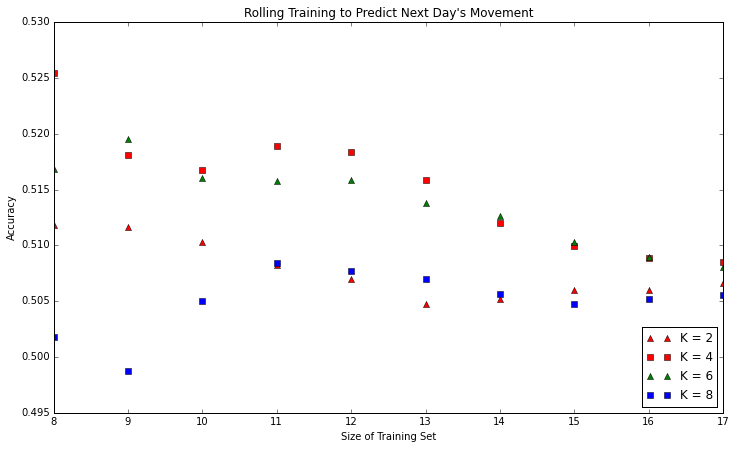

In [70]:
# USE THIS ONE: Perform NB, SVM, DT, and RF on a rolling n-day window basis and predict only next day

def calc_rolling_accuracy(class_model):
    accuracy_train_roll_logit = []
    indiv_accuracy_test_roll_logit = []
    accuracy_test_roll_logit = []

    #train_ranges = [50]
    train_ranges = range(8, 18, 1)

    for train_range in train_ranges:
        for n in range(1401 - train_range):
            class_model.fit(df_X[n:n+train_range], df_y[n:n+train_range])
            # Make class predictions for all observations in X
            predicted_labels_test_logit = class_model.predict(df_X[n+train_range:n+train_range+1])
            # Compare predicted class labels with actual class labels
            
            atrain_roll_logit = class_model.score(df_X[n:n+train_range], df_y[n:n+train_range])
            accuracy_train_roll_logit.append(atrain_roll_logit)
            atest_roll_logit = class_model.score(df_X[n+train_range:n+train_range+1], df_y[n+train_range:n+train_range+1])
            indiv_accuracy_test_roll_logit.append(atest_roll_logit)

            #print accuracy_train_roll
        rolling_test_acc_logit = sum(indiv_accuracy_test_roll_logit) / len(indiv_accuracy_test_roll_logit)
        accuracy_test_roll_logit.append(rolling_test_acc_logit)
        
    return train_ranges, accuracy_test_roll_logit


import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 7), dpi=100)

clf_roll_KNN = KNeighborsClassifier( n_neighbors = 2 )
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_KNN)
plt.plot(train_ranges, accuracy_test_roll_logit,'r^', label='K = 2')

clf_roll_KNN = KNeighborsClassifier( n_neighbors = 4 )
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_KNN)
plt.plot(train_ranges, accuracy_test_roll_logit,'rs', label='K = 4')

clf_roll_KNN = KNeighborsClassifier( n_neighbors = 6 )
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_KNN)
plt.plot(train_ranges, accuracy_test_roll_logit,'g^', label='K = 6')

clf_roll_KNN = KNeighborsClassifier( n_neighbors = 8 )
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_KNN)
plt.plot(train_ranges, accuracy_test_roll_logit,'bs', label='K = 8')

plt.legend(loc='lower right')

plt.title("Rolling Training to Predict Next Day's Movement")
plt.xlabel('Size of Training Set')
plt.ylabel('Accuracy')

In [72]:
# USE THIS ONE: Perform NB, SVM, DT, and RF on a rolling n-day window basis and predict only next day

def calc_rolling_accuracy(class_model):
    accuracy_train_roll_logit = []
    indiv_accuracy_test_roll_logit = []
    accuracy_test_roll_logit = []

    #train_ranges = [50]
    train_ranges = range(8, 11, 1)

    for train_range in train_ranges:
        for n in range(1401 - train_range):
            class_model.fit(df_X[n:n+train_range], df_y[n:n+train_range])
            # Make class predictions for all observations in X
            predicted_labels_test_logit = class_model.predict(df_X[n+train_range:n+train_range+1])
            # Compare predicted class labels with actual class labels
            
            atrain_roll_logit = class_model.score(df_X[n:n+train_range], df_y[n:n+train_range])
            accuracy_train_roll_logit.append(atrain_roll_logit)
            atest_roll_logit = class_model.score(df_X[n+train_range:n+train_range+1], df_y[n+train_range:n+train_range+1])
            indiv_accuracy_test_roll_logit.append(atest_roll_logit)

            #print accuracy_train_roll
        rolling_test_acc_logit = sum(indiv_accuracy_test_roll_logit) / len(indiv_accuracy_test_roll_logit)
        accuracy_test_roll_logit.append(rolling_test_acc_logit)
        
    return train_ranges, accuracy_test_roll_logit


import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 7), dpi=100)

clf_roll_KNN = KNeighborsClassifier( n_neighbors = 2 )
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_KNN)
df_surface = pd.DataFrame([accuracy_test_roll_logit], columns=list('ABC'))                     

clf_roll_KNN = KNeighborsClassifier( n_neighbors = 3 )
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_KNN)
df_surfadd = pd.DataFrame([accuracy_test_roll_logit], columns=list('ABC'))
df_surface.append(df_surfadd, ignore_index=True)

clf_roll_KNN = KNeighborsClassifier( n_neighbors = 4 )
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_KNN)
df_surfadd = pd.DataFrame([accuracy_test_roll_logit], columns=list('ABC'))
df_surface.append(df_surfadd, ignore_index=True)

,A,B,C
0,0.511845,0.511670,0.510297
1,0.525485,0.518133,0.516762


In [84]:
# USE THIS ONE: Perform NB, SVM, DT, and RF on a rolling n-day window basis and predict only next day

def calc_rolling_accuracy(class_model):
    accuracy_train_roll_logit = []
    indiv_accuracy_test_roll_logit = []
    accuracy_test_roll_logit = []

    #train_ranges = [50]
    train_ranges = range(8, 16, 1)

    for train_range in train_ranges:
        for n in range(1401 - train_range):
            class_model.fit(df_X[n:n+train_range], df_y[n:n+train_range])
            # Make class predictions for all observations in X
            predicted_labels_test_logit = class_model.predict(df_X[n+train_range:n+train_range+1])
            # Compare predicted class labels with actual class labels
            
            atrain_roll_logit = class_model.score(df_X[n:n+train_range], df_y[n:n+train_range])
            accuracy_train_roll_logit.append(atrain_roll_logit)
            atest_roll_logit = class_model.score(df_X[n+train_range:n+train_range+1], df_y[n+train_range:n+train_range+1])
            indiv_accuracy_test_roll_logit.append(atest_roll_logit)

            #print accuracy_train_roll
        rolling_test_acc_logit = sum(indiv_accuracy_test_roll_logit) / len(indiv_accuracy_test_roll_logit)
        accuracy_test_roll_logit.append(rolling_test_acc_logit)
        
    return train_ranges, accuracy_test_roll_logit

import matplotlib.pyplot as plt
%matplotlib inline

clf_roll_KNN = KNeighborsClassifier( n_neighbors = 2 )
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_KNN)
df_surface = pd.DataFrame([accuracy_test_roll_logit], columns=list('ABCDEFGH'))
                           
clf_roll_KNN = KNeighborsClassifier( n_neighbors = 3 )
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_KNN)
df_surfadd = pd.DataFrame([accuracy_test_roll_logit], columns=list('ABCDEFGH'))
df_surface = df_surface.append(df_surfadd, ignore_index=True)

clf_roll_KNN = KNeighborsClassifier( n_neighbors = 4 )
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_KNN)
df_surfadd = pd.DataFrame([accuracy_test_roll_logit], columns=list('ABCDEFGH'))
df_surface = df_surface.append(df_surfadd, ignore_index=True)

clf_roll_KNN = KNeighborsClassifier( n_neighbors = 5 )
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_KNN)
df_surfadd = pd.DataFrame([accuracy_test_roll_logit], columns=list('ABCDEFGH'))
df_surface = df_surface.append(df_surfadd, ignore_index=True)

clf_roll_KNN = KNeighborsClassifier( n_neighbors = 6 )
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_KNN)
df_surfadd = pd.DataFrame([accuracy_test_roll_logit], columns=list('ABCDEFGH'))
df_surface = df_surface.append(df_surfadd, ignore_index=True)

clf_roll_KNN = KNeighborsClassifier( n_neighbors = 7 )
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_KNN)
df_surfadd = pd.DataFrame([accuracy_test_roll_logit], columns=list('ABCDEFGH'))
df_surface = df_surface.append(df_surfadd, ignore_index=True)

clf_roll_KNN = KNeighborsClassifier( n_neighbors = 8 )
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_KNN)
df_surfadd = pd.DataFrame([accuracy_test_roll_logit], columns=list('ABCDEFGH'))
df_surface.append(df_surfadd, ignore_index=True)

clf_roll_KNN = KNeighborsClassifier( n_neighbors = 9 )
train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_KNN)
df_surfadd = pd.DataFrame([accuracy_test_roll_logit], columns=list('ABCDEFGH'))
df_surface.append(df_surfadd, ignore_index=True)

#clf_roll_KNN = KNeighborsClassifier( n_neighbors = 10 )
#train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_KNN)
#df_surfadd = pd.DataFrame([accuracy_test_roll_logit], columns=list('ABCDEFGHIJK'))
#df_surface.append(df_surfadd, ignore_index=True)

#clf_roll_KNN = KNeighborsClassifier( n_neighbors = 11 )
#train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_KNN)
#df_surfadd = pd.DataFrame([accuracy_test_roll_logit], columns=list('ABCDEFGHIJK'))
#df_surface.append(df_surfadd, ignore_index=True)

#clf_roll_KNN = KNeighborsClassifier( n_neighbors = 12 )
#train_ranges, accuracy_test_roll_logit = calc_rolling_accuracy(clf_roll_KNN)
#df_surfadd = pd.DataFrame([accuracy_test_roll_logit], columns=list('ABCDEFGHIJK'))
#df_surface.append(df_surfadd, ignore_index=True)

ValueError: Expected n_neighbors <= 8. Got 9

In [86]:
surface_dataframe = df_surface
surface_dataframe.to_csv('surface.csv', sep='\t')
surface_dataframe
#df.to_csv(file_name, sep='\t', encoding='utf-8')

,A,B,C,D,E,F,G,H
0,0.511845,0.511670,0.510297,0.508264,0.506973,0.504735,0.505242,0.506027
1,0.518306,0.510233,0.503831,0.505929,0.508124,0.506892,0.506372,0.505757
2,0.525485,0.518133,0.516762,0.518865,0.518332,0.515882,0.512025,0.509986
3,0.505384,0.501616,0.502155,0.501976,0.503523,0.504135,0.502569,0.500450
4,0.516870,0.519569,0.516044,0.515810,0.515888,0.513844,0.512641,0.510345
5,0.493180,0.496948,0.499761,0.500539,0.498634,0.496824,0.493320,0.492533


In [64]:
print(metrics.classification_report(y_test, predicted_labels_test_NB))
print(metrics.confusion_matrix(y_test, predicted_labels_test_NB))

             precision    recall  f1-score   support

        0.0       0.55      0.58      0.56       378
        1.0       0.48      0.45      0.47       325

avg / total       0.52      0.52      0.52       703

[[218 160]
 [178 147]]


In [65]:
print(metrics.classification_report(y_test, predicted_labels_test_DT))
print(metrics.confusion_matrix(y_test, predicted_labels_test_DT))

             precision    recall  f1-score   support

        0.0       0.53      0.49      0.51       378
        1.0       0.45      0.48      0.47       325

avg / total       0.49      0.49      0.49       703

[[187 191]
 [168 157]]


In [66]:
print(metrics.classification_report(y_test, predicted_labels_test_RF))
print(metrics.confusion_matrix(y_test, predicted_labels_test_RF))

             precision    recall  f1-score   support

        0.0       0.54      0.56      0.55       378
        1.0       0.46      0.44      0.45       325

avg / total       0.50      0.50      0.50       703

[[212 166]
 [182 143]]


In [67]:
from sklearn import tree
from sklearn.externals.six import StringIO  
import pydot 
import graphviz
import pyparsing

dot_data = StringIO()
tree.export_graphviz(model_DT, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("VIX_Predict_Decision_Tree.pdf")

Couldn't import dot_parser, loading of dot files will not be possible.


NameError: global name 'dot_parser' is not defined

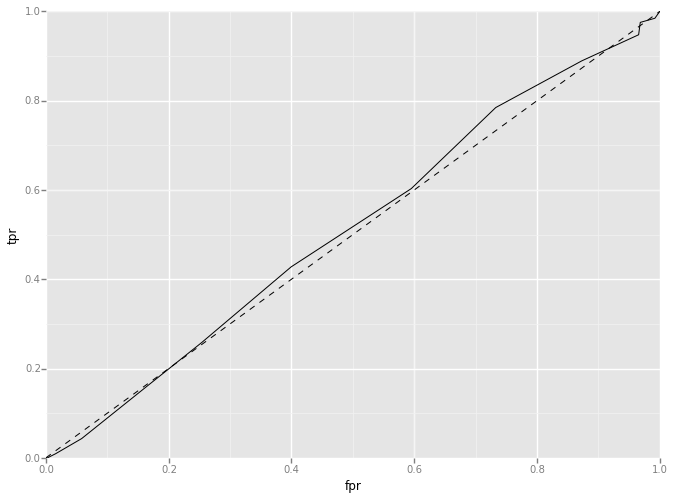

<ggplot: (288124745)>

In [68]:
from sklearn import metrics
import pandas as pd
from ggplot import *

preds = clf.predict_proba(X_test)[:,0]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

df_roc = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df_roc, aes(x='fpr', y='tpr')) + geom_line() + geom_abline(linetype='dashed')

In [69]:
tpr

array([ 0.        ,  0.        ,  0.00923077,  0.04307692,  0.15384615,
        0.25846154,  0.42769231,  0.60307692,  0.78461538,  0.88923077,
        0.94769231,  0.97538462,  0.98461538,  1.        ])

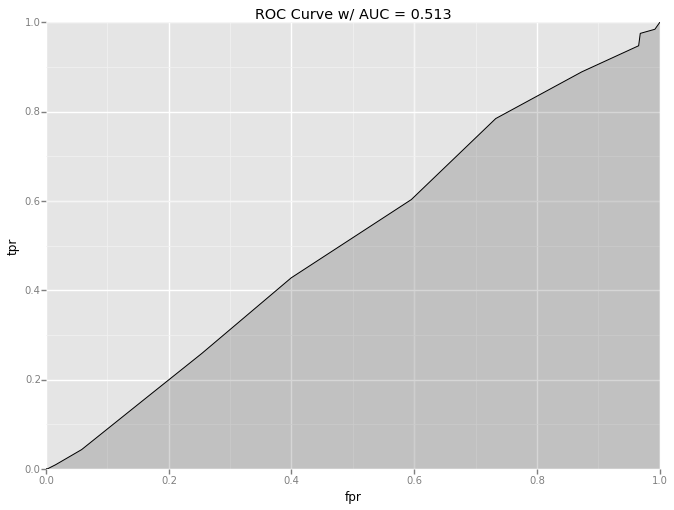

<ggplot: (284575585)>

In [70]:
auc = metrics.auc(fpr,tpr)
ggplot(df_roc, aes(x='fpr', ymin=0, ymax='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC = %.3f" % auc)


from sklearn.metrics import precision_recall_fscore_support
>y_true = np.array([0, 1, 2, 0, 1, 2])

>y_pred = np.array([0, 2, 1, 0, 0, 1])

>precision_recall_fscore_support(y_true, y_pred, average='macro')

class sklearn.feature_selection.RFE(estimator, n_features_to_select=None, step=1, estimator_params=None, verbose=0)

In [68]:
#df.to_csv(file_name, sep='\t')
#To use a specific encoding (e.g. 'utf-8') use the encoding argument:

#df.to_csv(file_name, sep='\t', encoding='utf-8')